In [25]:
from collections import Counter
import json
import os

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from transformers import pipeline

# 1. Load Sentiment Analysis Pipeline

In [2]:
sentiment_pipeline = pipeline("sentiment-analysis",device="mps")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use mps


# 2. Analyze Sampled Data
* predict sentiment of 'target'

In [22]:
weights = {
    "positive": [],
    "neutral": [],
    "negative": []
}

splits = ["train", "dev", "test"]
for split in splits:
    df = pd.read_csv(f"data/comet/{split}/react_sample.tsv", sep = "\t")
    targets = [
        x if isinstance(x, str) else "none" for x in df.target.values.tolist()
    ]
    predicted = sentiment_pipeline(targets)
    labels = [x['label'] for x in predicted]
    
    counter = Counter(labels)
    weights["positive"].append(counter["POSITIVE"]/len(targets))
    weights["neutral"].append(counter["NEUTRAL"]/len(targets))
    weights["negative"].append(counter["NEGATIVE"]/len(targets))

In [27]:
weights

{'positive': [0.5659563883591742, 0.5679574791192104, 0.5566037735849056],
 'neutral': [0.0, 0.0, 0.0],
 'negative': [0.4340436116408258, 0.43204252088078965, 0.44339622641509435]}

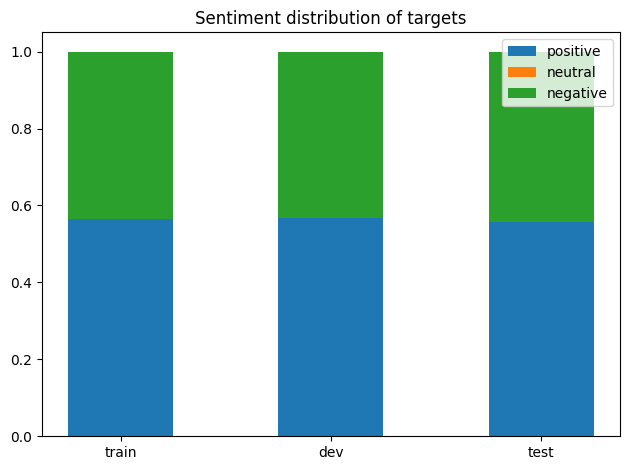

In [31]:
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weights.items():
    p = ax.bar(splits, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Sentiment distribution of targets")
# ax.legend(loc="upper right")
ax.legend()
plt.tight_layout()

plt.show()